In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = tf.constant(2.0)
y = tf.constant(8.0)
x = tf.Variable(10.0)

print(a)
print(x)

loss = tf.math.abs(a*x - y) # abs:절대값 리턴
loss

tf.Tensor(2.0, shape=(), dtype=float32)
<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>


<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

In [3]:
loss.numpy()

12.0

In [4]:
def train_func():
    with tf.GradientTape() as tape: # 자동미분된다.
        loss = tf.math.abs(a*x - y)
    dx = tape.gradient(loss, x)
    print('x = {}, dx = {}'.format(x.numpy(), dx))
    
    x.assign(x - dx) # x = x - dx
    
for i in range(4):
    train_func()

x = 10.0, dx = 2.0
x = 8.0, dx = 2.0
x = 6.0, dx = 2.0
x = 4.0, dx = 0.0


# GradientTape

In [22]:
%%time
# 데이터 집합 생성
x = np.array(np.arange(-5, 5, 0.1))
y = 2*x*x + 3 * x + 5

# 계수 설정 : 초기값
lr = 0.001

w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

# 학습
histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape: # GradientTape: 자동으로 미분이 된다.
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x +b - y)))
    
    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
    
    w1.assign_sub(lr*dw1) # w1 = w1-lr * dw
    w2.assign_sub(lr*dw2)
    b.assign_sub(lr*db)
    
    histLoss.append(loss)
    
    if epoch % 500 == 0:
        print("epoch = {}, loss ={}".format(epoch, loss))

epoch = 0, loss =15.339599609375
epoch = 500, loss =3.654714584350586
epoch = 1000, loss =2.3881609439849854
epoch = 1500, loss =2.092434883117676
epoch = 2000, loss =1.8692306280136108
epoch = 2500, loss =1.6479507684707642
epoch = 3000, loss =1.4266934394836426
epoch = 3500, loss =1.2054352760314941
epoch = 4000, loss =0.9841772317886353
epoch = 4500, loss =0.7629194259643555
epoch = 5000, loss =0.5416613221168518
epoch = 5500, loss =0.32040339708328247
epoch = 6000, loss =0.09914518892765045
epoch = 6500, loss =0.06283099204301834
epoch = 7000, loss =0.06285639107227325
epoch = 7500, loss =0.06295356154441833
epoch = 8000, loss =0.06295356154441833
epoch = 8500, loss =0.06295356154441833
epoch = 9000, loss =0.06295356154441833
epoch = 9500, loss =0.06295356154441833
Wall time: 14.1 s



추정 결과 :
w1 = 2.01
w2 = 3.00
b = 5.00
final loss = 0.0627


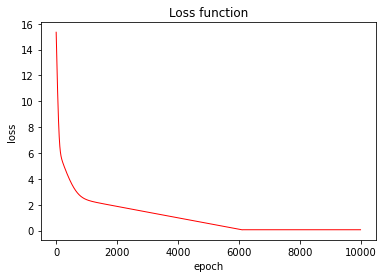

In [23]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# SGD + Momentum
- 전체 시간은 좀더 걸리지만 수렴하는 시간은 더 빠르다.

In [27]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

In [31]:
%%time
# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)
var_list = [w1, w2, b]  # variable list

# SGD optimizers 기능을 사용하고, Momentum 방법을 사용한다.
opt = optimizers.SGD(learning_rate = 0.001, momentum = 0.7, nesterov=False)

histLoss = []
for epoch in range(10000):
    with tf.GradientTape() as tape:
        loss = tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))
        
    grads = tape.gradient(loss, var_list)
    opt.apply_gradients(zip(grads, var_list))
    
    if epoch % 500 == 0 :
        histLoss.append(loss.numpy())
        print("epoch = {}, loss = {:.4f}".format(epoch, loss))

epoch = 0, loss = 15.3396
epoch = 500, loss = 2.0233
epoch = 1000, loss = 1.2854
epoch = 1500, loss = 0.5479
epoch = 2000, loss = 0.0376
epoch = 2500, loss = 0.0376
epoch = 3000, loss = 0.0376
epoch = 3500, loss = 0.0376
epoch = 4000, loss = 0.0376
epoch = 4500, loss = 0.0376
epoch = 5000, loss = 0.0376
epoch = 5500, loss = 0.0376
epoch = 6000, loss = 0.0376
epoch = 6500, loss = 0.0376
epoch = 7000, loss = 0.0376
epoch = 7500, loss = 0.0376
epoch = 8000, loss = 0.0376
epoch = 8500, loss = 0.0376
epoch = 9000, loss = 0.0376
epoch = 9500, loss = 0.0376
Wall time: 18 s



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00
final loss = 0.0363


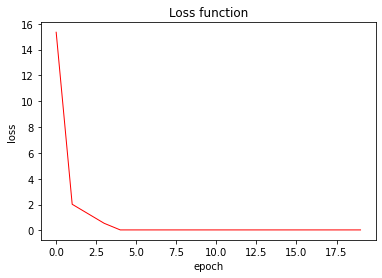

In [32]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())
print("final loss = %.4f" % loss.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Adam + minimize()

In [33]:
import tensorflow as tf
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5

# 그래프를 생성한다.   
w1 = tf.Variable(1.0)
w2 = tf.Variable(1.0)
b = tf.Variable(1.0)

In [50]:
def loss():
    return tf.sqrt(tf.reduce_mean(tf.square(w1*x*x + w2*x + b - y)))

opt = optimizers.Adam(learning_rate=0.01)

histLoss = []
for epoch in range(10000):
    opt.minimize(loss, var_list=[w1, w2, b])

    histLoss.append(loss())
    if epoch % 500 == 0:
        print("epoch : {}, loss = {}".format(epoch, histLoss[-1]))

epoch : 0, loss = 0.1179884672164917
epoch : 500, loss = 0.006193510722368956
epoch : 1000, loss = 0.008988842368125916
epoch : 1500, loss = 0.006649895571172237
epoch : 2000, loss = 0.006614812649786472
epoch : 2500, loss = 0.006648691836744547
epoch : 3000, loss = 0.0066613610833883286
epoch : 3500, loss = 0.006656522862613201
epoch : 4000, loss = 0.006653438787907362
epoch : 4500, loss = 0.006644283886998892
epoch : 5000, loss = 0.006641658488661051
epoch : 5500, loss = 0.006642023101449013
epoch : 6000, loss = 0.006638632155954838
epoch : 6500, loss = 0.0066382247023284435
epoch : 7000, loss = 0.0066382247023284435
epoch : 7500, loss = 0.006638100370764732
epoch : 8000, loss = 0.006632628384977579
epoch : 8500, loss = 0.006632012315094471
epoch : 9000, loss = 0.0066327485255897045
epoch : 9500, loss = 0.006632416043430567



추정 결과 :
w1 = 2.00
w2 = 3.00
b = 5.00


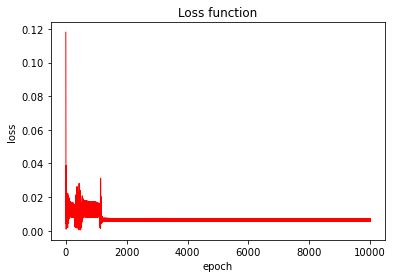

In [51]:
print("\n추정 결과 :")
print("w1 = %.2f" % w1.numpy())
print("w2 = %.2f" % w2.numpy())
print("b = %.2f" % b.numpy())

plt.plot(histLoss, color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# Keras - Sequential model

(100, 2)
Epoch 1/300
10/10 [==============================] - 0s 894us/step - loss: 908.7305
Epoch 2/300
10/10 [==============================] - 0s 889us/step - loss: 550.5801
Epoch 3/300
10/10 [==============================] - 0s 910us/step - loss: 335.3361
Epoch 4/300
10/10 [==============================] - 0s 997us/step - loss: 195.6033
Epoch 5/300
10/10 [==============================] - 0s 888us/step - loss: 104.7416
Epoch 6/300
10/10 [==============================] - 0s 892us/step - loss: 48.7228
Epoch 7/300
10/10 [==============================] - 0s 889us/step - loss: 20.2121
Epoch 8/300
10/10 [==============================] - 0s 1ms/step - loss: 8.2412
Epoch 9/300
10/10 [==============================] - 0s 1ms/step - loss: 3.9595
Epoch 10/300
10/10 [==============================] - 0s 999us/step - loss: 1.7684
Epoch 11/300
10/10 [==============================] - 0s 1ms/step - loss: 0.9434
Epoch 12/300
10/10 [==============================] - 0s 1ms/step - loss: 0.5671


10/10 [==============================] - 0s 778us/step - loss: 0.1460
Epoch 196/300
10/10 [==============================] - 0s 777us/step - loss: 5.0884e-06
Epoch 197/300
10/10 [==============================] - 0s 778us/step - loss: 0.1814
Epoch 198/300
10/10 [==============================] - 0s 778us/step - loss: 0.0470
Epoch 199/300
10/10 [==============================] - 0s 777us/step - loss: 0.0277
Epoch 200/300
10/10 [==============================] - 0s 889us/step - loss: 0.1829
Epoch 201/300
10/10 [==============================] - 0s 663us/step - loss: 0.0059
Epoch 202/300
10/10 [==============================] - 0s 1ms/step - loss: 0.1290
Epoch 203/300
10/10 [==============================] - 0s 778us/step - loss: 0.0917
Epoch 204/300
10/10 [==============================] - 0s 777us/step - loss: 0.0534
Epoch 205/300
10/10 [==============================] - 0s 889us/step - loss: 0.1803
Epoch 206/300
10/10 [==============================] - 0s 667us/step - loss: 4.1020e-06


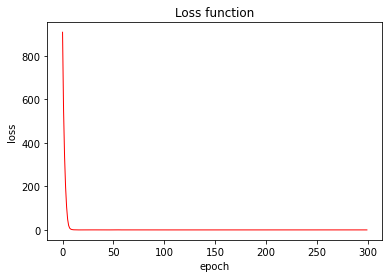

In [68]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T
print(dataX.shape)

# 그래프를 생성한다.
history = Sequential()
history.add(Dense(1, input_dim = 2))
history.compile(loss = 'mse', optimizer = optimizers.RMSprop(lr=0.05))

# 학습한다.
h = history.fit(dataX, y, batch_size =10, epochs = 300)

# 학습 결과를 확인한다.
parameters = model.layers[0].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [69]:
history.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


# Functional API

Epoch 1/1000
10/10 [==============================] - 0s 887us/step - loss: 328.4427
Epoch 2/1000
10/10 [==============================] - 0s 1ms/step - loss: 163.6540
Epoch 3/1000
10/10 [==============================] - 0s 1ms/step - loss: 74.0524
Epoch 4/1000
10/10 [==============================] - 0s 1ms/step - loss: 26.8577
Epoch 5/1000
10/10 [==============================] - 0s 1ms/step - loss: 11.4319
Epoch 6/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.6920
Epoch 7/1000
10/10 [==============================] - 0s 1ms/step - loss: 6.1283
Epoch 8/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.8587
Epoch 9/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.9757
Epoch 10/1000
10/10 [==============================] - 0s 888us/step - loss: 3.5751
Epoch 11/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.2868
Epoch 12/1000
10/10 [==============================] - 0s 1000us/step - loss: 3.0403
Epoch 13/10

10/10 [==============================] - 0s 1ms/step - loss: 4.7450e-07
Epoch 99/1000
10/10 [==============================] - 0s 666us/step - loss: 3.5637e-07
Epoch 100/1000
10/10 [==============================] - 0s 1000us/step - loss: 2.6511e-07
Epoch 101/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.9422e-07
Epoch 102/1000
10/10 [==============================] - 0s 667us/step - loss: 1.4599e-07
Epoch 103/1000
10/10 [==============================] - 0s 889us/step - loss: 1.0790e-07
Epoch 104/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.9171e-08
Epoch 105/1000
10/10 [==============================] - 0s 666us/step - loss: 5.7542e-08
Epoch 106/1000
10/10 [==============================] - 0s 888us/step - loss: 4.2378e-08
Epoch 107/1000
10/10 [==============================] - 0s 889us/step - loss: 3.0681e-08
Epoch 108/1000
10/10 [==============================] - 0s 667us/step - loss: 2.2822e-08
Epoch 109/1000
10/10 [====================

10/10 [==============================] - 0s 1ms/step - loss: 7.8700e-12
Epoch 283/1000
10/10 [==============================] - 0s 778us/step - loss: 7.8700e-12
Epoch 284/1000
10/10 [==============================] - 0s 888us/step - loss: 7.8700e-12
Epoch 285/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.8700e-12
Epoch 286/1000
10/10 [==============================] - 0s 778us/step - loss: 7.8700e-12
Epoch 287/1000
10/10 [==============================] - 0s 777us/step - loss: 7.8700e-12
Epoch 288/1000
10/10 [==============================] - 0s 889us/step - loss: 7.8700e-12
Epoch 289/1000
10/10 [==============================] - 0s 778us/step - loss: 7.8700e-12
Epoch 290/1000
10/10 [==============================] - 0s 889us/step - loss: 7.8700e-12
Epoch 291/1000
10/10 [==============================] - 0s 1ms/step - loss: 7.8700e-12
Epoch 292/1000
10/10 [==============================] - 0s 946us/step - loss: 7.8700e-12
Epoch 293/1000
10/10 [====================

10/10 [==============================] - 0s 889us/step - loss: 1.0510e-12
Epoch 467/1000
10/10 [==============================] - 0s 778us/step - loss: 1.0510e-12
Epoch 468/1000
10/10 [==============================] - 0s 1000us/step - loss: 1.0510e-12
Epoch 469/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.0510e-12
Epoch 470/1000
10/10 [==============================] - 0s 667us/step - loss: 1.0510e-12
Epoch 471/1000
10/10 [==============================] - 0s 888us/step - loss: 1.0510e-12
Epoch 472/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.0510e-12
Epoch 473/1000
10/10 [==============================] - 0s 667us/step - loss: 1.0510e-12
Epoch 474/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.0510e-12
Epoch 475/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.0510e-12
Epoch 476/1000
10/10 [==============================] - 0s 666us/step - loss: 1.0510e-12
Epoch 477/1000
10/10 [=====================

10/10 [==============================] - 0s 1ms/step - loss: 1.7979e-11
Epoch 651/1000
10/10 [==============================] - 0s 889us/step - loss: 3.4965e-11
Epoch 652/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.7505e-10
Epoch 653/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.4063e-10
Epoch 654/1000
10/10 [==============================] - 0s 889us/step - loss: 5.1156e-10
Epoch 655/1000
10/10 [==============================] - 0s 778us/step - loss: 2.5258e-10
Epoch 656/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.4636e-10
Epoch 657/1000
10/10 [==============================] - 0s 778us/step - loss: 1.6950e-10
Epoch 658/1000
10/10 [==============================] - 0s 667us/step - loss: 1.2087e-10
Epoch 659/1000
10/10 [==============================] - 0s 1ms/step - loss: 2.4114e-11
Epoch 660/1000
10/10 [==============================] - 0s 778us/step - loss: 1.8561e-11
Epoch 661/1000
10/10 [========================

10/10 [==============================] - 0s 889us/step - loss: 1.4652e-07
Epoch 836/1000
10/10 [==============================] - 0s 778us/step - loss: 1.3037e-06
Epoch 837/1000
10/10 [==============================] - 0s 888us/step - loss: 2.5765e-06
Epoch 838/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.0323e-06
Epoch 839/1000
10/10 [==============================] - 0s 667us/step - loss: 3.7448e-06
Epoch 840/1000
10/10 [==============================] - 0s 888us/step - loss: 5.7740e-06
Epoch 841/1000
10/10 [==============================] - 0s 1ms/step - loss: 1.3771e-05
Epoch 842/1000
10/10 [==============================] - 0s 1ms/step - loss: 3.7706e-06
Epoch 843/1000
10/10 [==============================] - 0s 777us/step - loss: 3.5357e-06
Epoch 844/1000
10/10 [==============================] - 0s 1ms/step - loss: 4.3603e-06
Epoch 845/1000
10/10 [==============================] - 0s 889us/step - loss: 1.1723e-06
Epoch 846/1000
10/10 [======================

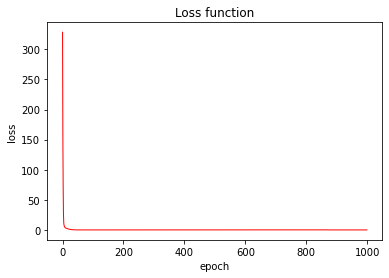

In [73]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import optimizers
import numpy as np
import matplotlib.pyplot as plt

# y = 2x^2 + 3x + 5 일 때 x, y 집합을 생성한다
x = np.array(np.arange(-5, 5, 0.1))
y = 2 * x * x + 3 * x + 5
dataX = np.stack([x*x, x]).T

# 그래프를 생성한다.   
xInput = Input(batch_shape=(None, dataX.shape[1]))
yOutput = Dense(1)(xInput)
model = Model(xInput, yOutput)
model.compile(loss='mse', optimizer=optimizers.Adam(learning_rate=0.05))

h = model.fit(dataX, y, batch_size=10, epochs=1000, verbose=1)

# 학습 결과를 확인한다.
parameters = model.layers[1].get_weights()
print("\n추정 결과 :")
print("w1 = %.2f" % parameters[0][0][0])
print("w2 = %.2f" % parameters[0][1][0])
print("b = %.2f" % parameters[1][0])

plt.plot(h.history['loss'], color='red', linewidth=1)
plt.title("Loss function")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

# tensorflow 1.4로 iris 분류

In [74]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [75]:
import numpy as np
import pandas as pd
from sklearn import datasets

In [76]:
iris = datasets.load_iris()
iris_X = iris.data
iris_y = pd.get_dummies(iris.target).to_numpy()

In [77]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(iris_X, iris_y, 
                                                    test_size=0.3,
                                                    random_state=1)

In [78]:
# X와 y를 저장할 변수 선언
x = tf.placeholder(tf.float32, [None, 4]) # 변수 수가 4개
y = tf.placeholder(tf.float32, [None, 3]) # 분류 클래스 수가 3개

In [79]:
# Weight와 bias를 저장할 변수 선언
W = tf.Variable(tf.zeros([4, 3]))
b = tf.Variable(tf.zeros([3]))

In [80]:
# 출력을 정의
h = tf.nn.softmax(tf.matmul(x, W) + b)

In [81]:
# 손실함수 정의
cross_entropy = -tf.reduce_sum(y*tf.log(h), reduction_indices=[1])
loss = tf.reduce_mean(cross_entropy)

In [82]:
# 학습(훈련) 정의(옵티마이저, 학습률)
train = tf.train.GradientDescentOptimizer(0.001).minimize(loss)

In [83]:
init = tf.global_variables_initializer()

In [84]:
sess = tf.Session()
sess.run(init)

In [85]:
for i in range(100000):
    _, loss_value = sess.run([train, loss], feed_dict={x:train_X, y:train_y})
    if i%10000 == 0:
        print(i, loss_value)

0 1.0986121
10000 0.34161025
20000 0.25733852
30000 0.21406321
40000 0.18752667
50000 0.16956554
60000 0.15657532
70000 0.146726
80000 0.13898855
90000 0.13273862


In [86]:
correct_prediction = tf.equal(tf.argmax(h, 1), tf.argmax(y, 1))

In [87]:
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [88]:
print(sess.run(accuracy, feed_dict={x:test_X, y:test_y}))

0.9777778
